In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
def grayTransfer(imageName,imageList):
  with open(imageName,"r") as file:
    for line in file:
      if line != '\x1a':
        imageList.extend(line.rstrip("\n\x1a"))
  for i in range(len(imageList)):
    if imageList[i].isalpha():
      imageList[i] = str(ord(imageList[i].lower()) - 87)

In [ ]:
def addConst(imageList,const):
  for i in range(len(imageList)):
    if imageList[i]+const <= 31:
      if imageList[i] +const >= 0:
        imageList[i] += const
      else :imageList[i] =0
    else :imageList[i] = 31


In [ ]:
def multiplyConst(imageList,const):
  for i in range(len(imageList)):
    if imageList[i]*const <= 31:
      if imageList[i] * const >= 0:
        imageList[i] *= const
      else:
        imageList[i] = 0
    else :imageList[i] = 31

In [ ]:
def avgTwo(imageList1,imageList2):
  # for i in range(len(imageList1)):
  #   imageList1[i] = (imageList1[i]+imageList2[i])/2
  return (imageList1+imageList2)/2

In [ ]:
def modifyPixel(imageList):
  newImage = []
  for i in range(len(imageList)):
    if imageList[i] - imageList[i-1] >=0:
      newImage.append(imageList[i] - imageList[i-1])
    else:newImage.append(0)
  return newImage


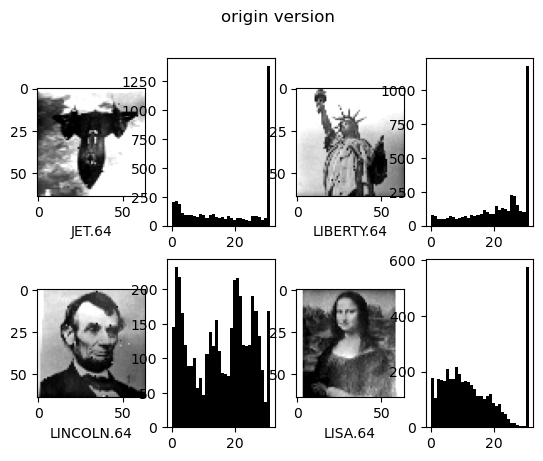

In [20]:
# origin version
imagesName = ['JET.64', 'LIBERTY.64', 'LINCOLN.64', 'LISA.64']
num = 1
for image in imagesName:
  imageList= []
  grayTransfer(image,imageList)
  imageList = np.array([int(x) for x in imageList])
  plt.suptitle("origin version")
  plt.subplot(2, 4, num).imshow(imageList.reshape(64, 64), cmap='gray')
  plt.xlabel(image)
  plt.subplot(2, 4, num+1).hist(imageList, bins=32,color="black")
  num += 2

In [ ]:
# add value=5 to each pixel
num = 1
for image in imagesName:
  imageList = []
  grayTransfer(image, imageList)
  imageList = np.array([int(x) for x in imageList])
  addConst(imageList,-10)
  plt.subplot(2, 4, num).imshow(imageList.reshape(64, 64), cmap='gray')
  plt.subplot(2, 4, num+1).hist(imageList, bins=32, color="black")
  num += 2


In [ ]:
# multiply value = 5 to each pixel
num = 1
for image in imagesName:
  imageList = []
  grayTransfer(image, imageList)
  imageList = np.array([int(x) for x in imageList])
  multiplyConst(imageList, 5)
  plt.subplot(2, 4, num).imshow(imageList.reshape(64, 64), cmap='gray')
  plt.subplot(2, 4, num+1).hist(imageList, bins=32, color="black")
  num += 2


In [ ]:
#Create a new image which is the average image of two input images
imageList1 = []
imageList2 = []
grayTransfer('JET.64',imageList1)
grayTransfer('LIBERTY.64',imageList2)
imageList1 = np.array([int(x) for x in imageList1])
imageList2 = np.array([int(x) for x in imageList2])
newImage = np.array([int(x) for x in avgTwo(imageList1, imageList2)])
plt.subplot(1, 2, 1).imshow(newImage.reshape(64, 64), cmap='gray')
plt.subplot(1, 2, 2).hist(newImage, bins=32, color="black")


In [ ]:
#change pixel by equation
num = 1
for image in imagesName:
  imageList = []
  grayTransfer(image, imageList)
  imageList = np.array([int(x) for x in imageList])
  imageList = np.array([int(x) for x in modifyPixel(imageList)])
  plt.subplot(2, 4, num).imshow(imageList.reshape(64, 64), cmap='gray')
  plt.subplot(2, 4, num+1).hist(imageList, bins=32, color="black")
  num += 2
